In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
plt.rcdefaults()

In [2]:
def PlotHistogramIntervals(df):
    #Plots histogram of intevals between counts
    df['sum'] = df.iloc[:,1:].sum(axis = 1)
    diff = df[df['sum'] > 0].iloc[:,0].diff().dropna()
    fig, ax = plt.subplots()
    ax.hist( diff, bins = 100, edgecolor = 'black' )
    plt.show()

In [3]:
def PlotSum(df):
        #Plots sum of ADC counts for each sensor in format ' SUM_{i}'
    fig, ax = plt.subplots()
    sum = []
    for i in range(20):
        sum.append(df[f' SUM_{i}'].sum())
    ax.scatter(range(20), sum)
    ax.set_xlabel('PD index')
    ax.set_ylabel('ADC counts')
    ax.set_xticks(range(20))
    ax.set_title('ADC conts per PD')
    plt.show()
    #fig.savefig('./ADC conts per PD')
    #print(df.sum())

In [4]:
def PlotSum2(df):
    #Plots sum of ADC counts for each sensor in format 'sum_{i}'
    fig, ax = plt.subplots()
    sum = []
    for i in range(20):
        sum.append(df[f'sum_{i}'].sum())
    ax.scatter(range(20), sum)
    ax.set_xlabel('PD index')
    ax.set_ylabel('ADC counts')
    ax.set_xticks(range(20))
    ax.set_title('ADC conts per PD')
    ax.grid()
    plt.show()
    #fig.savefig('./ADC conts per PD')
    #print(df.sum())

In [5]:
def PlotTemp(df):
    #Plots temperature vs timestamp
    fig, ax = plt.subplots()
    ax.plot(df['timestamp'],df['pt100'])
    ax.set_xlabel('timestamp')
    ax.set_ylabel('pt100')
    ax.set_title('Temperature over time')
    plt.show()

In [6]:
def PlotVolt(df):
    #Plots volts vs timestamp
    fig, ax = plt.subplots()
    ax.scatter(df['timestamp'],df['volt'],s=2, alpha=0.5)
    ax.set_xlabel('timestamp')
    ax.set_ylabel('volt')
    ax.set_title('Voltage over time')
    plt.show()

In [7]:
def PlotADCvsTime(df):
    #Plots sum over 50 frames vs timestamps
    newdf = [[] for i in range(20) ]
    with plt.rc_context():
        plt.rcParams.update({'xtick.labelsize':4})
        plt.rcParams.update({'ytick.labelsize':4})
        plt.rcParams.update({'lines.linewidth':0.5})
        plt.rcParams.update({'font.size': 4})

        fig, ax = plt.subplots(4,5)
        for i in range(20):
            for j in range(int(df.shape[0]/50)):
                newdf[i].append(df.iloc[50*j:50*(j+1)].sum().loc[f'sum_{i}'])

            ax[i//5,i%5].plot(df['timestamp'][[50*k for k in range(int(df.shape[0]/50))]], newdf[i])
            ax[i//5,i%5].set_xlabel('timestamp')
            ax[i//5,i%5].set_ylabel('ADC counts')
            ax[i//5,i%5].set_title(f'ADC conts sensor {i}')
            ax[i//5,i%5].grid()
        plt.tight_layout()
        plt.show()
        fig.savefig('./ADC counts over time', dpi=1000)

In [8]:
df1 = pd.read_csv('./sumsq.R0.csv')
#print(df1.columns.values)
df2 = pd.read_csv('./adc1_ch7.csv')
df3 = pd.read_csv('./adc1_ch9.csv')
df4 = pd.read_csv('./Pedestals-20250711143315-R0.csv')
dftemp = pd.read_csv('./Pedestals-20250711143315-temperatures.csv')
dfvolt = pd.read_csv('./Pedestals-20250711143315-voltage.csv')

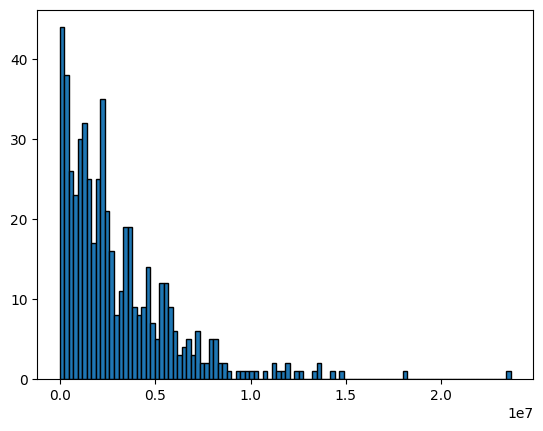

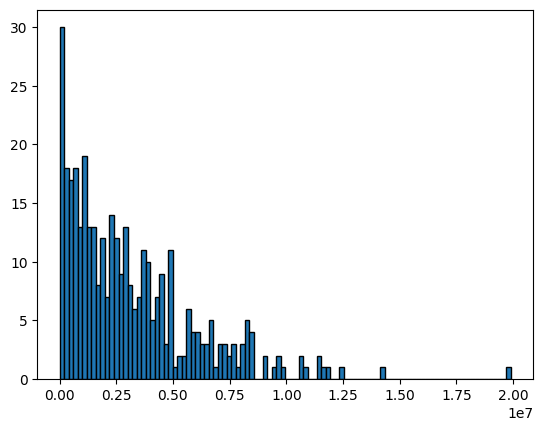

In [9]:
PlotHistogramIntervals(df2)
PlotHistogramIntervals(df3)

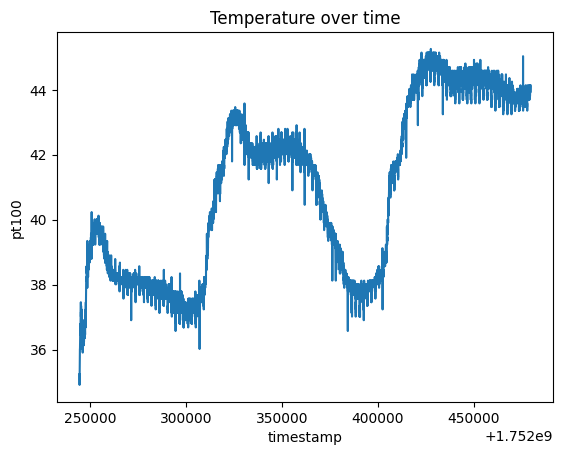

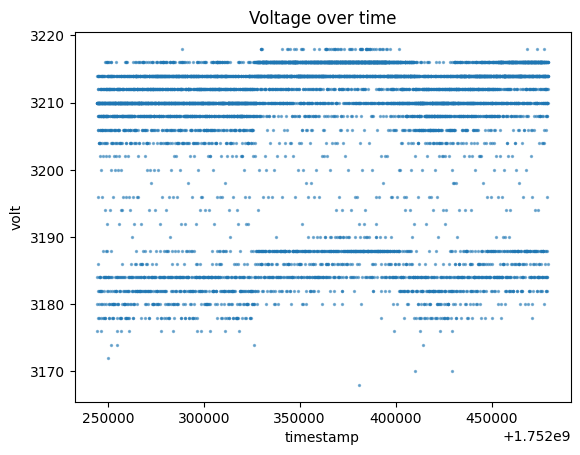

In [10]:
PlotTemp(dftemp)
PlotVolt(dfvolt)

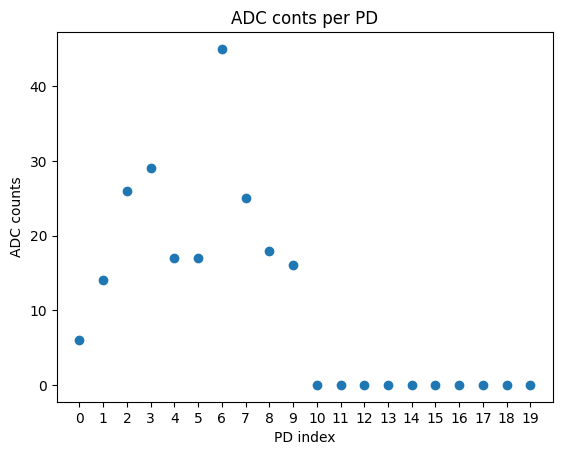

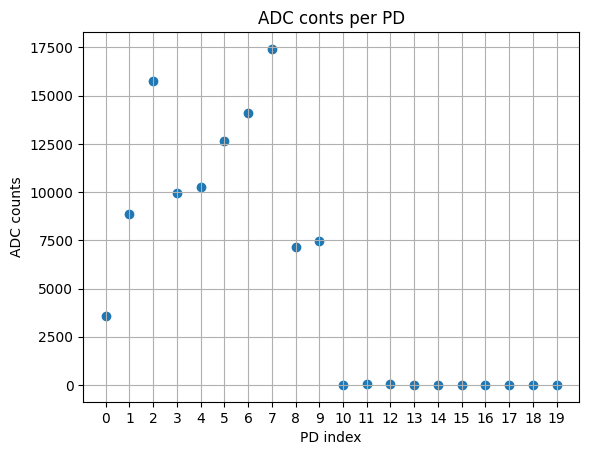

3370792692.0
sum_0      3554.0
sum_1      8870.0
sum_2     15770.0
sum_3      9943.0
sum_4     10289.0
sum_5     12644.0
sum_6     14085.0
sum_7     17424.0
sum_8      7160.0
sum_9      7487.0
sum_10       11.0
sum_11       24.0
sum_12       38.0
sum_13        2.0
sum_14        2.0
sum_15       11.0
sum_16        3.0
sum_17        0.0
sum_18        5.0
sum_19       20.0
dtype: float64


In [13]:
PlotSum(df1)
PlotSum2(df4)

print (df4.sum().iloc[1]) #total samples
#print(df4.iloc[0:10].sum())
print(df4.sum().iloc[[4*i+2 for i in range(20)]]) #Total counts per sesnor

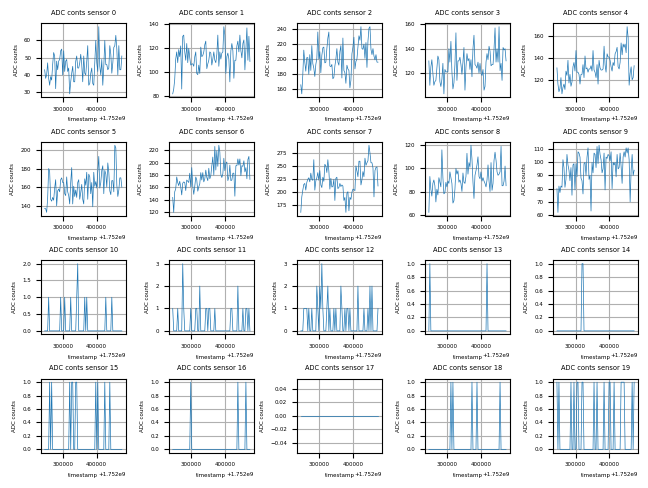

In [12]:
PlotADCvsTime(df4)